# MNIST classification using multi-layer perceptron

#### 1. Import packages

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import random_split, DataLoader
from tqdm.notebook import trange, tqdm
import matplotlib.pyplot as plt
%matplotlib inline
from MLP import *

#### 2. Prepare dataset

Choose device

In [2]:
device = get_default_device()

Constants

In [3]:
batchSize = 100
datasetDir = "./datasets"

Get data

In [4]:
trainData = datasets.MNIST(root=datasetDir, train=True, transform=transforms.ToTensor(), download=True)
testData = datasets.MNIST(root=datasetDir, train=False, transform=transforms.ToTensor(), download=True)
trainSet, valSet = random_split(trainData, [50000, 10000]) # Create validation set

Data loaders

In [5]:
trainLoader = DataLoader(trainSet, batch_size=batchSize, shuffle=True, num_workers=4, pin_memory=True)
valLoader = DataLoader(valSet, batch_size=batchSize, shuffle=False, num_workers=4, pin_memory=True)
testLoader = DataLoader(testData, batch_size=batchSize, shuffle=False, num_workers=4, pin_memory=True)

trainLoader = DeviceDataLoader(trainLoader, device)
valLoader = DeviceDataLoader(valLoader, device)
testLoader = DeviceDataLoader(testLoader, device)

#### 3. Train model

Initialize model

In [6]:
model = MNIST_MLP(28*28, 256, 10)
to_device(model, device)

MNIST_MLP(
  (linear1): Linear(in_features=784, out_features=256, bias=True)
  (linear2): Linear(in_features=256, out_features=10, bias=True)
)

Constants

In [7]:
numEpochs = 5
learningRate = 0.001

Initial accuracy

In [8]:
epochAccuracy = [evaluate(model, valLoader)]

Train model

In [9]:
epochAccuracy += fit(numEpochs, learningRate, model, trainLoader, valLoader)

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [0], val_loss: 2.2083, val_acc: 0.3575


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [1], val_loss: 2.0967, val_acc: 0.5556


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [2], val_loss: 1.9630, val_acc: 0.6474


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [3], val_loss: 1.8076, val_acc: 0.7004


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [4], val_loss: 1.6397, val_acc: 0.7256


Plot accuracy vs num epoch

[0.09529999643564224, 0.35749998688697815, 0.5555999875068665, 0.6474000811576843, 0.7003999948501587, 0.725600004196167]


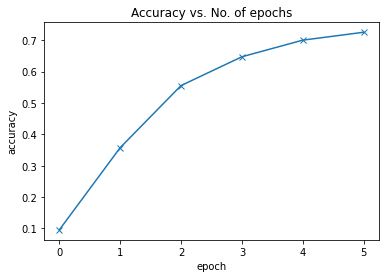

In [10]:
accuracies = [result['val_acc'] for result in epochAccuracy]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs');
print(f"{accuracies}")

#### 4. Test model

In [11]:
# Overall test accuracy
result = evaluate(model, testLoader)
print(f"Test accuracy={result['val_acc']}")

keyboard = 'n'
while keyboard == 'n':
    img, label = testData[int(torch.randint(0, len(testData), (1,1)))]
    displayImage(img, label, predict_image(img, model, device))
    keyboard = input("enter n to see next image, or anything else to exit: ")

Test accuracy=0.7329000234603882


NameError: name 'device' is not defined